In [2]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Cargar el dataset de dígitos (8x8 imágenes)
digits = load_digits()
X, y = digits.images, digits.target  # X tiene forma (n_samples, 8, 8)

# Aplanar las imágenes para redes densas (Fully Connected)
X = X.reshape(X.shape[0], -1)  # de (n_samples, 8, 8) a (n_samples, 64)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Número de clases
num_classes = len(np.unique(y))

# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes)  # Logits
])

# Compilar
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Entrenar
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.4f}')

# Predicciones
logits = model.predict(X_test)
predicted = np.argmax(logits, axis=1)
print(classification_report(y_test, predicted))


c:\Users\USUARIO\Downloads\ANN TensorFlow And Pytorch\NNapp1\NNapp\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4398 - loss: 1.8745
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7488 - loss: 0.9580
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.4846
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.2762
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1804
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.1294
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0979
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0768
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9910 - loss: 0.0607
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0499
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0398
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9979 - lo

In [5]:
import os
import PIL.Image as Image
# ========================
# 2. Dividir en train, val, test
# ========================
# Primero: train vs resto
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
# Segundo: de ese resto, val vs test
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.5, random_state=42, stratify=y_tmp
)
print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")

# ========================
# 3. Función para guardar imágenes
# ========================
def save_split(split_name, X_split, y_split, root="digits_splits"):
    split_dir = os.path.join(root, split_name)
    for img, label in zip(X_split, y_split):
        # Carpeta de la clase
        class_dir = os.path.join(split_dir, str(label))
        os.makedirs(class_dir, exist_ok=True)

        # Normalizar a 0–255 y convertir a uint8
        arr = (255 * (img - img.min()) / (img.max() - img.min())).astype(np.uint8)

        # Convertir a PIL y redimensionar a 28x28 (opcional, estilo MNIST)
        im = Image.fromarray(arr, mode="L").resize((28, 28), Image.NEAREST)

        # Nombre de archivo único
        fname = f"{label}_{np.random.randint(1e9)}.png"
        im.save(os.path.join(class_dir, fname))

# ========================
# 4. Guardar cada split
# ========================
for split_name, Xs, ys in [
    ("train", X_train, y_train),
    ("val",   X_val,   y_val),
    ("test",  X_test,  y_test),
]:
    save_split(split_name, Xs, ys)

print("Datos guardados en carpetas: digits_splits/train|val|test/<clase>/imagen.png")

Train: 1257, Val: 270, Test: 270


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_18572\3639948243.py:30: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  im = Image.fromarray(arr, mode="L").resize((28, 28), Image.NEAREST)


Datos guardados en carpetas: digits_splits/train|val|test/<clase>/imagen.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Clase real: 6
Clase predicha: 6


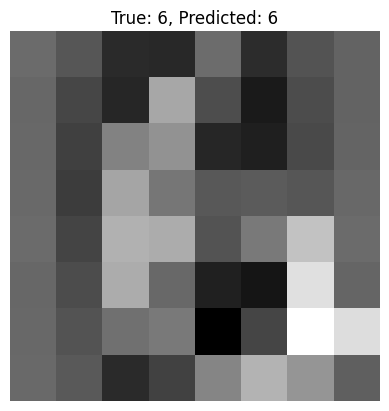

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Elegir un índice de ejemplo del conjunto de prueba
idx = 0  # Cambia a cualquier índice que quieras probar
image = X_test[idx]  # Imagen aplanada
label_true = y_test[idx]

# Convertir a batch de 1 ejemplo
image_batch = np.expand_dims(image, axis=0)  # shape (1, 64)

# Pasar por el modelo
logits = model.predict(image_batch)  # output logits
predicted_class = np.argmax(logits, axis=1)[0]

print(f'Clase real: {label_true}')
print(f'Clase predicha: {predicted_class}')

# Mostrar la imagen
plt.imshow(image.reshape(8,8), cmap='gray')
plt.title(f'True: {label_true}, Predicted: {predicted_class}')
plt.axis('off')
plt.show()
